### 목표
- 어떤 사람이 일년에 개인 수입이 $50k 달러 초과인지 예측해보자.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
submission = pd.read_csv("../data/sample_submission.csv")
train = pd.read_csv("../data/train.csv", index_col='no')
test = pd.read_csv("../data/test.csv", index_col='no')

In [5]:
print("데이터 확인", train.shape)
print("데이터 확인", test.shape)
print("데이터 확인", submission.shape)

데이터 확인 (29305, 15)
데이터 확인 (19537, 14)
데이터 확인 (19537, 2)


### 2.데이터 전처리

In [6]:
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
train_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


#### 2.1 데이터 정보확인(결측값 존재여부 확인)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB


In [8]:
train_df.corr()

C:\Users\smhrd\AppData\Local\Temp\ipykernel_40596\1233823885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.075753,0.035084,0.078498,0.054413,0.073100,0.238460
fnlwgt,-0.075753,1.000000,-0.030600,-0.005051,-0.001513,-0.010154,-0.002994
education-num,0.035084,-0.030600,1.000000,0.127651,0.083925,0.147569,0.331798
capital-gain,0.078498,-0.005051,0.127651,1.000000,-0.031401,0.088609,0.221387
capital-loss,0.054413,-0.001513,0.083925,-0.031401,1.000000,0.055271,0.135645
hours-per-week,0.073100,-0.010154,0.147569,0.088609,0.055271,1.000000,0.231045
income,0.238460,-0.002994,0.331798,0.221387,0.135645,0.231045,1.000000


In [9]:
test_df['native-country'].value_counts()

 United-States                 17531
 Mexico                          372
 ?                               362
 Philippines                     117
 Germany                          82
 Canada                           71
 Puerto-Rico                      67
 India                            61
 El-Salvador                      59
 China                            54
 England                          52
 Italy                            45
 Cuba                             44
 Dominican-Republic               42
 South                            41
 Jamaica                          38
 Japan                            38
 Guatemala                        37
 Vietnam                          36
 Poland                           34
 Columbia                         32
 Taiwan                           26
 Ecuador                          24
 Portugal                         24
 Haiti                            24
 Greece                           24
 Nicaragua                        21
 

In [10]:
train_df['workclass']

no
1                  Private
2                  Private
3                  Private
4                  Private
5                  Private
               ...        
29301              Private
29302              Private
29303     Self-emp-not-inc
29304              Private
29305                    ?
Name: workclass, Length: 29305, dtype: object

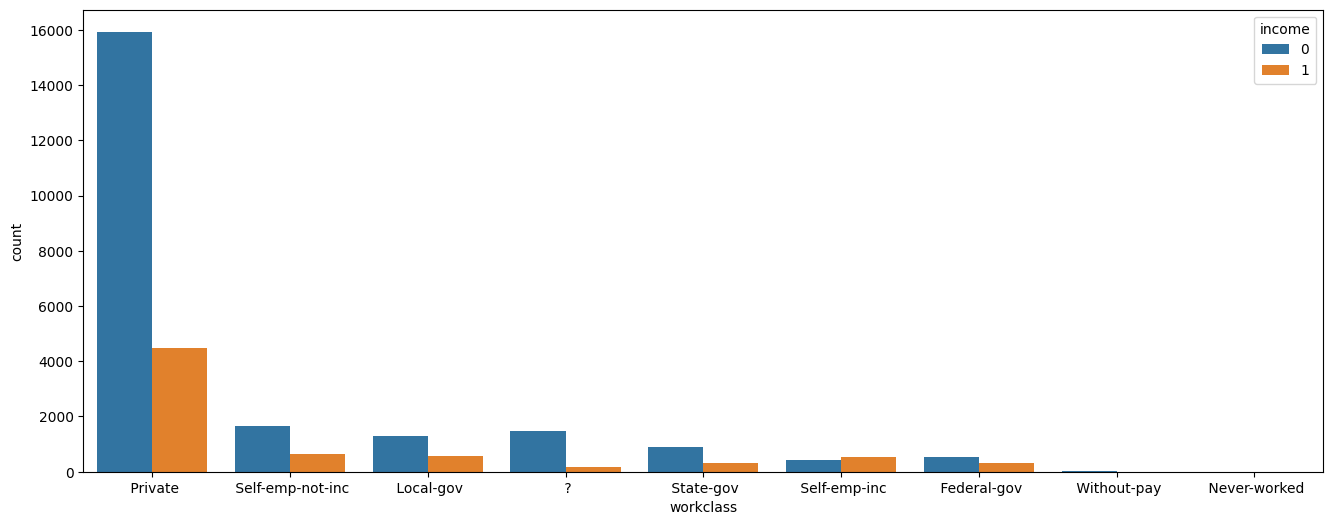

In [11]:
# workclass -> income 관련도
plt.figure(figsize=(16,6))
sns.countplot(data = train_df, x='workclass', hue='income')
plt.show()

In [12]:
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [13]:
set(train_df.columns)- set(test_df.columns)

{'income', 'native-country_ Holand-Netherlands'}

In [14]:
test_df['native-country_ Holand-Netherlands']=0

In [15]:
X_train = train_df.drop("income", axis=1)
y_train = train_df.loc[:,"income"]

In [16]:
print("훈련용" ,X_train.shape, y_train.shape)
print("테스트용" ,test_df.shape)

훈련용 (29305, 108) (29305,)
테스트용 (19537, 108)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [18]:
rf = RandomForestClassifier(random_state=10)

In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [21]:
test_df = test_df[X_train.columns]

In [22]:
pre = rf.predict(test_df)

In [ ]:
result = pd.read_csv("./data/sample_submission.csv")


In [ ]:
result['income'] = pre
result.to_csv('./23_04_19.csv', index=False)

In [ ]:
cross_val_score(rf, X_train, y_train, cv=5)

array([0.85531479, 0.85565603, 0.84644259, 0.8580447 , 0.85412046])

In [25]:
# from sklearn.model_selection import GridSearchCV

# # 튜닝할 매개변수 정의 하기, 경우의 수를 입력

# params = {
#     'n_estimators':[50,70,100,120,150],
#     'max_depth':[3,5,7,9,11],
#     'max_leaf_nodes':range(2,11),
#     'min_samples_split':[3,5,7,9,11]

# }
# # 임의의 모델 설정
# model = RandomForestClassifier(random_state=10)

# # 그리드 서치 객체 생성
# grid = GridSearchCV(model, params, cv=5, scoring='accuracy')

# # 그리드 서치 실행(학습한다.), 매개변수가 많을 수록 시간이 오래 걸릴 수 있음
# # 학습용 데이터 활용
# grid.fit(X_train,y_train)




GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': [3, 5, 7, 9, 11],
                         'n_estimators': [50, 70, 100, 120, 150]},
             scoring='accuracy')

In [28]:
# 가장 높은 성능일 때의 모델에 대한 하이퍼 파라미터 조합 확인하기
print("최대 성능 : " ,grid.best_score_)
print("최대 성능일 때의 파라미터 조합 : ", grid.best_params_)
#최대 성능 :  0.8293806517659104
#최대 성능일 때의 파라미터 조합 :  {'max_depth': 7, 'max_leaf_nodes': 8, 'min_samples_split': 3, 'n_estimators': 100}
#{'max_depth': 9, 'max_leaf_nodes': 10, 'min_samples_split': 3, 'n_estimators': 150}


최대 성능 :  0.8334072683842348
최대 성능일 때의 파라미터 조합 :  {'max_depth': 9, 'max_leaf_nodes': 10, 'min_samples_split': 3, 'n_estimators': 150}


In [29]:
best_rf = RandomForestClassifier(max_depth=9, max_leaf_nodes=10, min_samples_split=3, n_estimators=150, random_state=10)

In [30]:
best_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, max_leaf_nodes=10, min_samples_split=3,
                       n_estimators=150, random_state=10)

In [34]:
temp =best_rf.predict(test_df)

In [32]:
cross_val_score(best_rf, X_train,y_train,cv=5)

array([0.8324518 , 0.84200648, 0.82750384, 0.83279304, 0.83228118])

In [39]:
submission['income'] = temp
submission

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,1
4,29310,1
...,...,...
19532,48838,0
19533,48839,0
19534,48840,0
19535,48841,0


In [40]:
submission.to_csv("./04_20.csv", index=False)